<a href="https://colab.research.google.com/github/bintangnabiil/Deep_Learning/blob/main/Deep_Learning_Compressed_Data_Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# ===== STEP 1: Load dataset dari file .gz =====
df = pd.read_csv("compressed_data.csv.gz")

# Cek info dataset
print(df.info())

# Pastikan 'Cover_Type' adalah target
target_column = "Cover_Type"
X = df.drop(columns=[target_column])  # Fitur
y = df[target_column]  # Label

# ===== STEP 2: Preprocessing (Encoding & Normalization) =====
# Encode target labels agar mulai dari 0
encoder = LabelEncoder()
y = encoder.fit_transform(y)  # Mengubah label agar mulai dari 0

# Cek apakah encoding sudah benar
print("Unique target labels after encoding:", np.unique(y))

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Konversi ke PyTorch tensor
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.long)
y_test_torch = torch.tensor(y_test, dtype=torch.long)

# Hitung jumlah fitur dan kelas
input_dim = X_train.shape[1]
num_classes = len(np.unique(y))  # Harus sesuai jumlah kelas unik

# ===== STEP 3: Model MLP dengan PyTorch =====
class MLP_Torch(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(MLP_Torch, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)  # Output layer harus sesuai jumlah kelas

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)  # Tidak pakai softmax!
        return x

# Inisialisasi model
model_torch = MLP_Torch(input_dim, num_classes)
criterion = nn.CrossEntropyLoss()  # Loss function untuk multi-class classification
optimizer = optim.Adam(model_torch.parameters(), lr=0.001)

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model_torch(X_train_torch)
    loss = criterion(outputs, y_train_torch)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 5 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# ===== STEP 4: Model MLP dengan TensorFlow =====
model_tf = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(input_dim,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')  # Softmax digunakan di TensorFlow
])

# Compile model
model_tf.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Sama dengan CrossEntropyLoss di PyTorch
    metrics=['accuracy']
)

# Training model
model_tf.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_data=(X_test, y_test))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Soil_Type1                          581012 non-null 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - accuracy: 0.7490 - loss: 0.5939 - val_accuracy: 0.8157 - val_loss: 0.4359
Epoch 2/20
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - accuracy: 0.8234 - loss: 0.4178 - val_accuracy: 0.8423 - val_loss: 0.3804
Epoch 3/20
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 81s 3ms/step - accuracy: 0.8467 - loss: 0.3684 - val_accuracy: 0.8537 - val_loss: 0.3541
Epoch 4/20
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 82s 3ms/step - accuracy: 0.8604 - loss: 0.3391 - val_accuracy: 0.8664 - val_loss: 0.3320
Epoch 5/20
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 77s 2ms/step - accuracy: 0.8685 - loss: 0.3209 - val_accuracy: 0.8718 - val_loss: 0.3153
Epoch 6/20
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.8743 - loss: 0.3063 - val_accuracy: 0.8700 - val_loss: 0.3188
Epoch 7/20
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 47s 3ms/step - accuracy: 0.8790 - loss: 0.2954 - val_accuracy: 0.8781 - val_loss: 0.3004
Epoch 8/20
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


=== Evaluasi PyTorch ===
Akurasi  : 0.6056
Presisi  : 0.1758
Recall   : 0.1970
F1 Score : 0.1827
----------------------------------------
=== Evaluasi TensorFlow ===
Akurasi  : 0.9004
Presisi  : 0.8464
Recall   : 0.8500
F1 Score : 0.8463
----------------------------------------


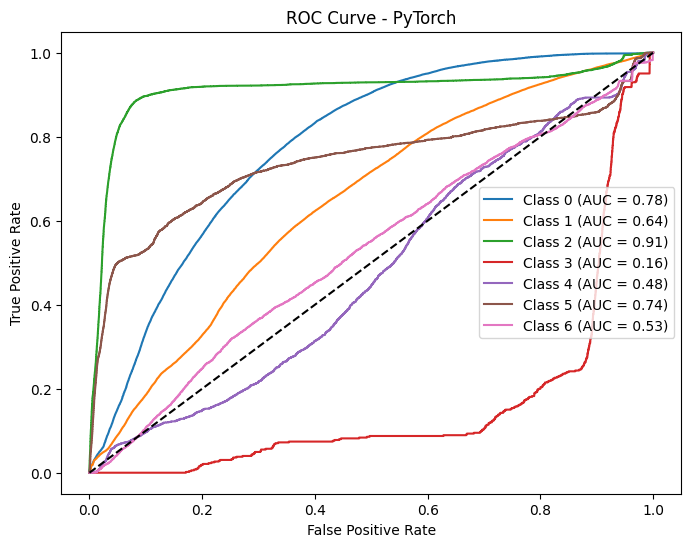

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step


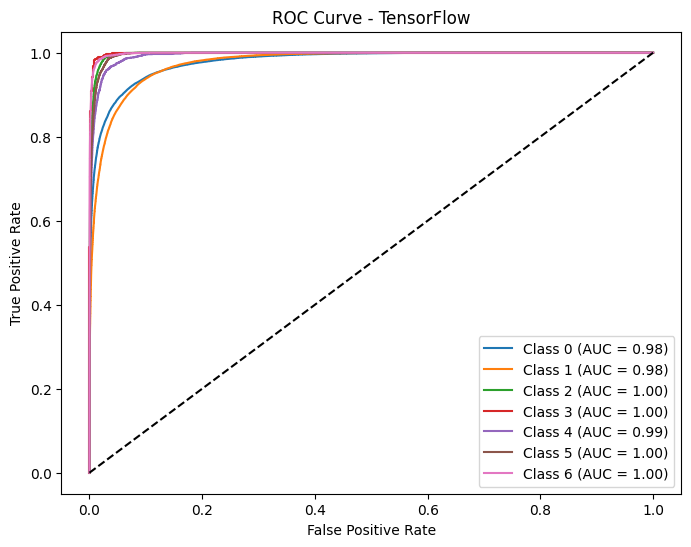

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import torch.nn.functional as F

# ===== PREDIKSI MENGGUNAKAN PYTORCH =====
model_torch.eval()
with torch.no_grad():
    logits = model_torch(X_test_torch)  # Hasil output dari model (logits)
    y_pred_torch = torch.argmax(logits, dim=1).cpu().numpy()  # Ambil kelas dengan probabilitas tertinggi

# ===== PREDIKSI MENGGUNAKAN TENSORFLOW =====
y_pred_tf = model_tf.predict(X_test)
y_pred_tf = np.argmax(y_pred_tf, axis=1)  # Ambil kelas dengan probabilitas tertinggi

# ===== HITUNG METRIK EVALUASI =====
def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')  # Menggunakan macro karena multi-class
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    print(f"=== Evaluasi {model_name} ===")
    print(f"Akurasi  : {acc:.4f}")
    print(f"Presisi  : {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1 Score : {f1:.4f}")
    print("-" * 40)

    return acc, precision, recall, f1

# Evaluasi untuk PyTorch
evaluate_model(y_test, y_pred_torch, "PyTorch")

# Evaluasi untuk TensorFlow
evaluate_model(y_test, y_pred_tf, "TensorFlow")

# ===== ROC & AUC (Hanya bisa untuk multi-class dengan One-vs-Rest) =====
def plot_roc_auc(y_true, y_probs, model_name):
    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(y_true == i, y_probs[:, i])
        auc = roc_auc_score(y_true == i, y_probs[:, i])
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.show()

# ===== ROC AUC untuk PyTorch =====
y_probs_torch = F.softmax(logits, dim=1).cpu().numpy()  # Konversi logits ke probabilitas
plot_roc_auc(y_test, y_probs_torch, "PyTorch")

# ===== ROC AUC untuk TensorFlow =====
plot_roc_auc(y_test, model_tf.predict(X_test), "TensorFlow")

#Persamaan Matematika
##1. Akurasi
Akurasi adalah metrik evaluasi yang mengukur seberapa sering model memprediksi dengan benar dibandingkan dengan jumlah total prediksi yang dilakukan. Akurasi sangat berguna jika dataset memiliki distribusi kelas yang seimbang, tetapi bisa menyesatkan jika dataset tidak seimbang (misalnya, jika satu kelas jauh lebih dominan daripada yang lain).

Persamaan matematikanya adalah:

$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$

Di mana:
- TP (True Postive) = data positif yang diklasifikasikan sebagai positif.
- TN (True Negative) = data negatif yang diklasifikasikan sebagai negatif.
- FP (False Positive) = data negatif yang diklasifikasikan sebagai positif.
- FN (False Negative) = data negatif yang diklasifikasikan sebagai negatif.<br><br>

Akurasi memberi gambaran keseluruhan dari performa model, tetapi tidak cukup jika kelas tidak seimbang. <br><br>

##2. Presisi
Presisi mengukur seberapa banyak prediksi positif yang benar dibandingkan dengan total prediksi yang dibuat sebagai positif. Metrik ini sangat berguna dalam kasus di mana False Positive harus diminimalkan (misalnya dalam diagnosa penyakit atau deteksi spam).

Persamaan matematikanya adalah:

$Precision = \frac{TP}{TP + FP}$

Di mana:
- $TP$ = jumlah prediksi positif yang benar.
- $FP$ = jumlah prediksi positif yang salah.

Jika presisi tinggi, berarti model jarang salah saat memprediksi kelas positif. Namun, presisi tidak mempertimbangkan False Negative.<br><br>

##3. Recall (Sensitivity atau True Positive Rate)
Recall mengukur seberapa banyak data positif yang berhasil diidentifikasi dengan benar oleh model. Recall sangat penting dalam situasi di mana False Negative harus diminimalkan, misalnya dalam pendeteksian kanker di bidang medis.

Persamaan matematikanya adalah:

$Recall = \frac{TP}{TP+FN}$

Di mana:
- $TP$ = jumlah prediksi positif yang benar.
- $FN$ = jumlah prediksi positif yang terlewatkan oleh model(salah diklasifikasikan sebagai negatif).

Jika recall tinggi, berarti model jarang melewatkan kelas positif, tetapi bisa jadi banyak False Positive.<br><br>

##4. F1-Score
F1-Score adalah rata-rata harmonik dari presisi dan recall, yang digunakan untuk menyeimbangkan keduanya dalam satu metrik. F1-Score berguna jika kita ingin mempertimbangkan False Positive dan False Negative secara bersamaan.

Persamaan matematikanya adalah:

$F1 = 2 \times\frac{Precision\times Recall}{Precision+Recall}$

F1-Score lebih baik digunakan dibandingkan akurasi jika dataset tidak seimbang, karena mempertimbangkan kesalahan klasifikasi dalam bentuk False Positive dan False Negative. <br><br>

##5. AUC (Area Under Curve) dan ROC (Reciever Operating Characteristic)
AUC-ROC adalah metrik yang digunakan untuk mengevaluasi performa model klasifikasi dalam memisahkan kelas positif dan negatif. ROC adalah grafik yang menunjukkan hubungan antara True Positive Rate (TPR) dan False Positive Rate (FPR).

Persamaan untuk True Positive Rate (TPR) atau Recall:

$TPR = \frac{TP}{TP+FN}$

Persamaan untuk False Positive Rate (FPR):

$FPR = \frac{FP}{FP+TN}$

Kurva ROC menggambarkan hubungan antara TPR dan FPR dengan berbagai threshold. Nilai AUC dihitung sebagai luas di bawah kurva ROC, dengan nilai berkisar dari 0 hingga 1:

- $AUC = 1.0$ --> model sempurna.
- $AUC = 0.5$ --> model sama seperti tebak-tebakan.
- $AUC < 0.5$ --> model lebih buruk dari tebak-tebakan (perlu perbaikan).

ROC-AUC sangat bermanfaat dalam multi-class classification jika kita menggunakan pendekatan One-vs-Rest (OvR).